In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [129]:
crowdfunding_2018 = pd.read_csv('ks-projects-201801.csv')

crowdfunding_2018

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,"1,000.00",2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,"1,533.95"
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,"30,000.00",2017-09-02 04:43:57,"2,421.00",failed,15,US,100.00,"2,421.00","30,000.00"
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,"45,000.00",2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,"45,000.00"
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,"5,000.00",2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,"5,000.00"
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,"19,500.00",2015-07-04 08:35:03,"1,283.00",canceled,14,US,"1,283.00","1,283.00","19,500.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,"50,000.00",2014-09-17 02:35:30,25.00,canceled,1,US,25.00,25.00,"50,000.00"
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,"1,500.00",2011-06-22 03:35:14,155.00,failed,5,US,155.00,155.00,"1,500.00"
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,"15,000.00",2010-07-01 19:40:30,20.00,failed,1,US,20.00,20.00,"15,000.00"
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,"15,000.00",2016-01-13 18:13:53,200.00,failed,6,US,200.00,200.00,"15,000.00"


In [140]:
# clean_crowdfunding_2018 = crowdfunding_2018.drop(['name', 'goal', 'pledged', 'usd pledged'], axis=1)

# pd.options.display.float_format = "{:,.2f}".format

# Nettoyage des données
crowdfunding_2018['state'] = crowdfunding_2018['state'].replace('undefined', pd.NA)
crowdfunding_2018.dropna(inplace=True)  # Suppression des lignes contenant des valeurs manquantes
crowdfunding_2018['launched'] = pd.to_datetime(crowdfunding_2018['launched'])
crowdfunding_2018['deadline'] = pd.to_datetime(crowdfunding_2018['deadline'])
crowdfunding_2018['usd_pledged_real'] = crowdfunding_2018['usd_pledged_real'].round(2)
crowdfunding_2018['days_to_deadline'] = (crowdfunding_2018['deadline'] - crowdfunding_2018['launched']).dt.days
crowdfunding_2018['year'] = crowdfunding_2018['launched'].dt.year
crowdfunding_2018['month'] = crowdfunding_2018['launched'].dt.month

# Calcul du pourcentage atteint de l'objectif
crowdfunding_2018['percentage_reached'] = (crowdfunding_2018['usd_pledged_real'] / crowdfunding_2018['usd_goal_real']) * 100

# Suppression des colonnes inutiles
clean_crowdfunding_2018 = crowdfunding_2018.drop(['launched', 'deadline', 'name', 'goal', 'pledged', 'usd pledged'], axis=1)


clean_crowdfunding_2018[clean_crowdfunding_2018['percentage_reached'] > 100]

,ID,category,main_category,currency,state,backers,country,usd_pledged_real,usd_goal_real,days_to_deadline,year,month,percentage_reached
5,1000014025,Restaurants,Food,USD,successful,224,US,"52,375.00","50,000.00",34,2016,2,104.75
6,1000023410,Food,Food,USD,successful,16,US,"1,205.00","1,000.00",19,2014,12,120.50
11,100005484,Indie Rock,Music,USD,successful,100,US,"12,700.00","12,500.00",29,2013,3,101.60
14,1000057089,Tabletop Games,Games,GBP,successful,761,GB,"121,857.33","6,469.73",27,2017,4,"1,883.50"
20,1000072011,Fashion,Fashion,USD,successful,624,US,"34,268.00","20,000.00",34,2013,11,171.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
378642,999929142,Tabletop Games,Games,EUR,successful,35,FR,"1,452.47","1,165.70",26,2017,10,124.60
378644,999934908,Product Design,Design,USD,successful,120,US,"6,169.00","3,500.00",21,2015,11,176.26
378646,999943841,Children's Books,Publishing,USD,successful,31,US,"1,732.02",950.00,42,2013,10,182.32
378651,999969812,Classical Music,Music,CAD,successful,78,CA,"4,983.69","4,529.81",29,2014,2,110.02


### Problématique : "Quels sont les facteurs déterminants du succès des projets sur Kickstarter ?"
  * I/ influence de la catégorie du projet sur son succès
  * II/ effet de la période de lancement sur le succès
  * III/ impact du pays d'origine sur le succès du projet
  * Bonus : impact du nombre de contributeurs sur le succès du projet (à réflechir)

In [131]:
print(f"Premières lignes : \n{clean_crowdfunding_2018.head()}")
print(f"Fin du dataframe : \n{clean_crowdfunding_2018.tail()}")
print(f"Informations sur le dataframe : \n{clean_crowdfunding_2018.info()}")

print(f"Dimensions du dataframe : {clean_crowdfunding_2018.shape}", f"\nNombre de lignes : {clean_crowdfunding_2018.shape[0]}", f"\nNombre de colonnes : {clean_crowdfunding_2018.shape[1]}")
print(f"Nombre et types d'entités : \n{clean_crowdfunding_2018.dtypes}")

print(f"Statistiques descriptives : \n{clean_crowdfunding_2018.describe()}")

Premières lignes : 
           ID        category main_category currency     state  backers  \
0  1000002330          Poetry    Publishing      GBP    failed        0   
1  1000003930  Narrative Film  Film & Video      USD    failed       15   
2  1000004038  Narrative Film  Film & Video      USD    failed        3   
3  1000007540           Music         Music      USD    failed        1   
4  1000011046    Film & Video  Film & Video      USD  canceled       14   

  country  usd_pledged_real  usd_goal_real  days_to_deadline  year  month  \
0      GB              0.00       1,533.95                58  2015      8   
1      US          2,421.00      30,000.00                59  2017      9   
2      US            220.00      45,000.00                44  2013      1   
3      US              1.00       5,000.00                29  2012      3   
4      US          1,283.00      19,500.00                55  2015      7   

   percentage_reached  
0                0.00  
1                8

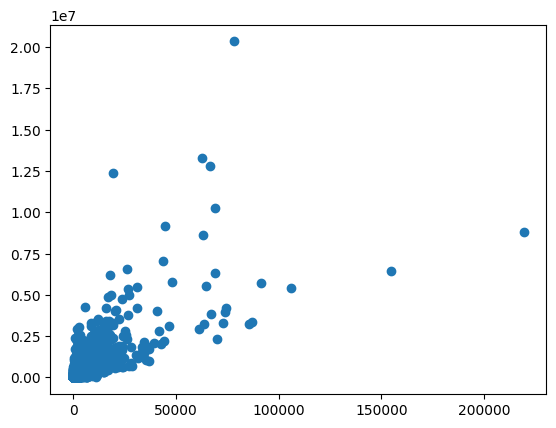

In [132]:
plt.scatter(clean_crowdfunding_2018['backers'], clean_crowdfunding_2018['usd_pledged_real'])
plt.show()

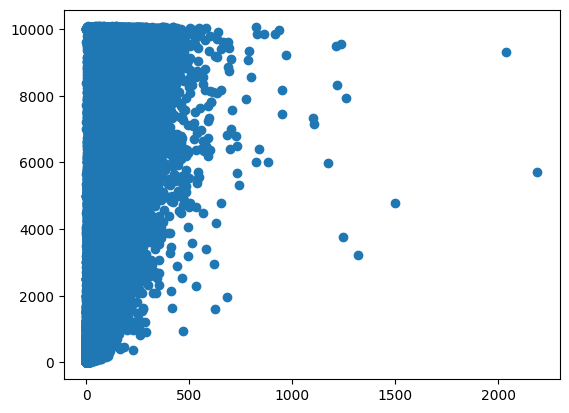

In [133]:
# Calcul de Q1, Q3, et de l'IQR pour la variable 'pledged'
Q1 = clean_crowdfunding_2018['usd_pledged_real'].quantile(0.25)
Q3 = clean_crowdfunding_2018['usd_pledged_real'].quantile(0.75)
IQR = Q3 - Q1

# Définition des bornes pour les valeurs aberrantes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrage des valeurs aberrantes
clean_crowdfunding_2018_filtered = clean_crowdfunding_2018[(clean_crowdfunding_2018['usd_pledged_real'] >= lower_bound) & (clean_crowdfunding_2018['usd_pledged_real'] <= upper_bound)]

# Affichage des résultats
plt.scatter(clean_crowdfunding_2018_filtered['backers'], clean_crowdfunding_2018_filtered['usd_pledged_real'])
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


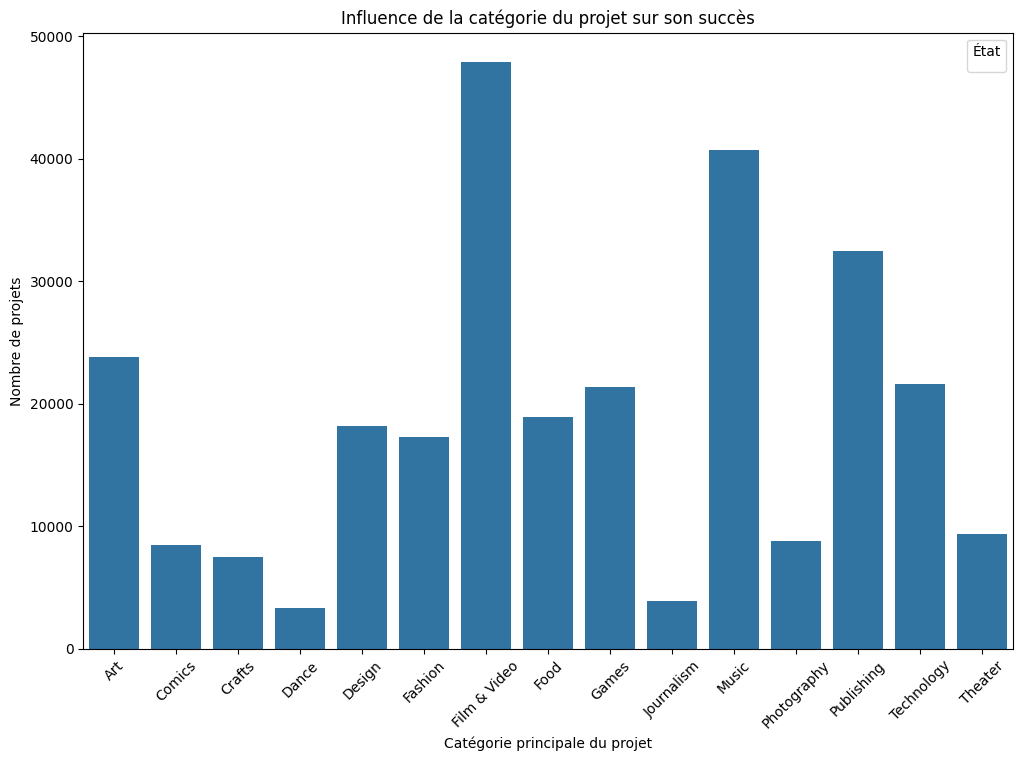

In [134]:
# Création d'un dataframe avec le nombre de projets réussis et échoués pour chaque catégorie
success_by_category = clean_crowdfunding_2018_filtered.groupby(['main_category', 'state']).size().unstack()

success_by_category['total'] = success_by_category['successful'] + success_by_category['failed']

# Création du graphique à barres empilées
plt.figure(figsize=(12, 8))
sns.barplot(data=success_by_category, x=success_by_category.index, y='total')

# Personnalisation du graphique
plt.title("Influence de la catégorie du projet sur son succès")
plt.xlabel("Catégorie principale du projet")
plt.ylabel("Nombre de projets")
plt.legend(title='État', loc='upper right')
plt.xticks(rotation=45)
plt.show()

In [135]:
#Calculons le nombre total de projets par catégorie
total_projects_by_category = clean_crowdfunding_2018_filtered.groupby('main_category').size()

#Calculons le nombre de succès et d'échecs par catégorie
success_failure_by_category = clean_crowdfunding_2018_filtered.groupby(['main_category', 'state']).size().unstack(fill_value=0)

#Normalisons les comptages par le nombre total de projets dans chaque catégorie
normalized_success_failure = success_failure_by_category.div(total_projects_by_category, axis=0)

normalized_success_failure

state,canceled,failed,live,successful,suspended
main_category,,,,,
Art,0.08,0.53,0.01,0.37,0.00
Comics,0.09,0.43,0.01,0.47,0.00
Crafts,0.10,0.67,0.01,0.21,0.01
Dance,0.05,0.35,0.01,0.59,0.00
Design,0.17,0.62,0.01,0.19,0.01
Fashion,0.13,0.69,0.01,0.16,0.01
Film & Video,0.10,0.59,0.01,0.30,0.00
Food,0.10,0.73,0.01,0.15,0.01
Games,0.21,0.56,0.01,0.22,0.01


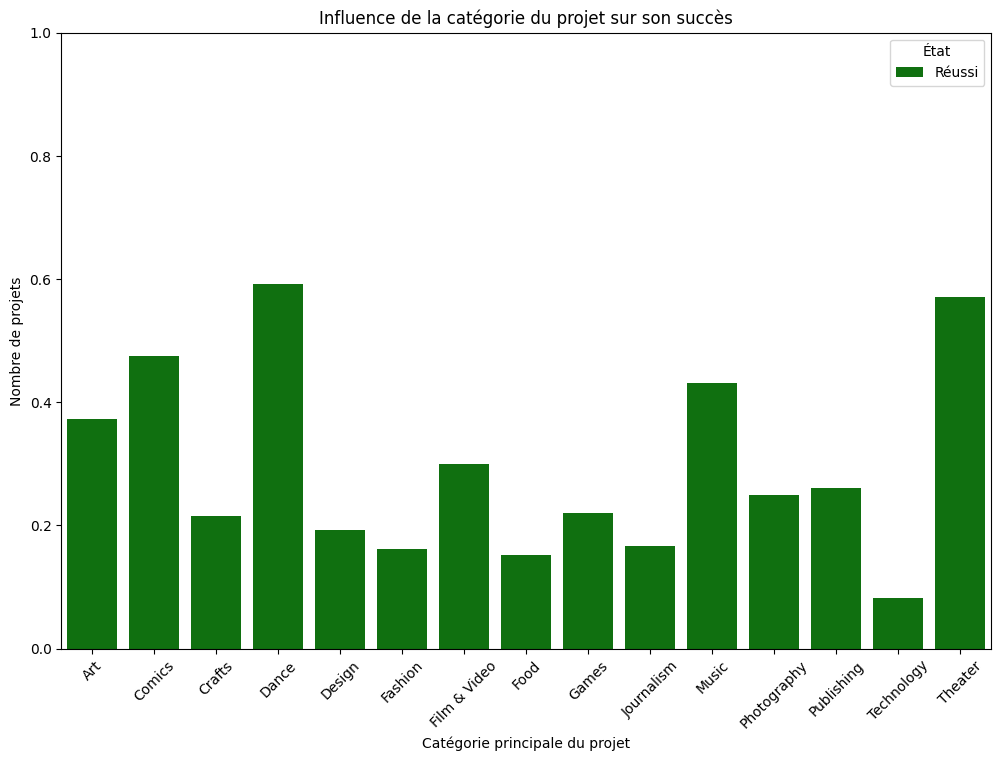

In [136]:
# Création du graphique à barres empilées
plt.figure(figsize=(12, 8))
sns.barplot(data=normalized_success_failure, x=normalized_success_failure.index, y='successful', color='green', label='Réussi')

# Personnalisation du graphique
plt.title("Influence de la catégorie du projet sur son succès")
plt.xlabel("Catégorie principale du projet")
plt.ylabel("Nombre de projets")
plt.legend(title='État', loc='upper right')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

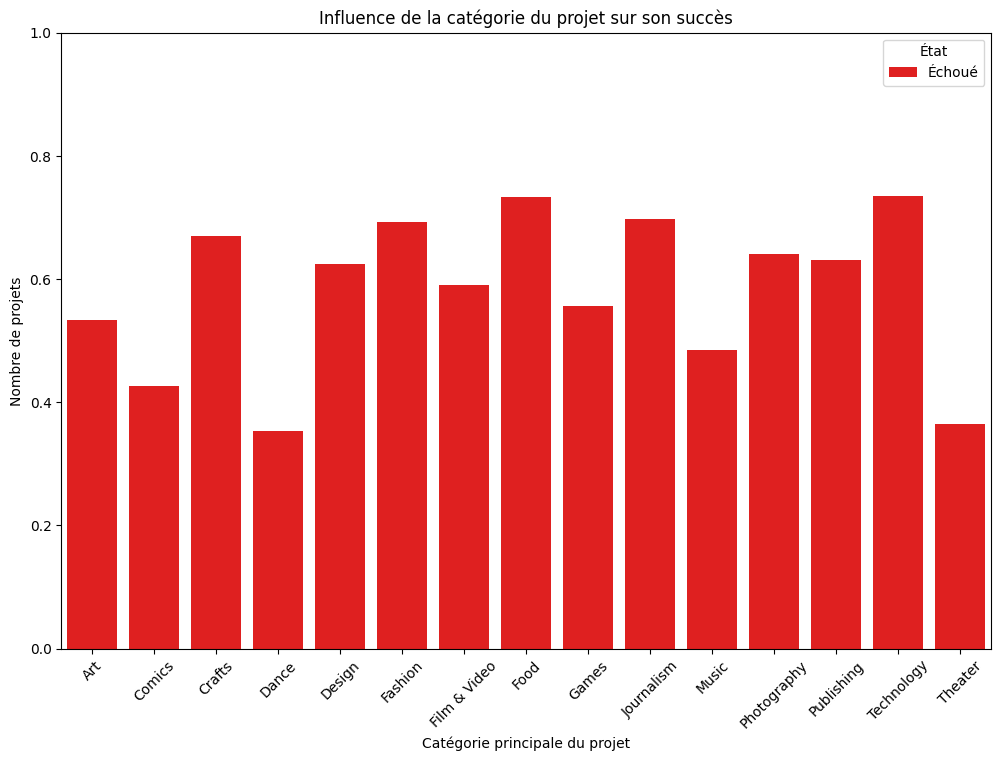

In [137]:
# Création du graphique à barres empilées
plt.figure(figsize=(12, 8))
sns.barplot(data=normalized_success_failure, x=normalized_success_failure.index, y='failed', color='red', label='Échoué')

# Personnalisation du graphique
plt.title("Influence de la catégorie du projet sur son succès")
plt.xlabel("Catégorie principale du projet")
plt.ylabel("Nombre de projets")
plt.legend(title='État', loc='upper right')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

In [138]:
#Calculons le nombre total de projets par catégorie

dance_film = clean_crowdfunding_2018_filtered[(clean_crowdfunding_2018_filtered['main_category'] == 'Dance') | (clean_crowdfunding_2018_filtered['main_category'] == 'Film & Video')]

total_projects_by_category = dance_film.groupby('category').size()

#Calculons le nombre de succès et d'échecs par catégorie
success_failure_by_category = dance_film.groupby(['category', 'state']).size().unstack(fill_value=0)

#Normalisons les comptages par le nombre total de projets dans chaque catégorie
normalized_success_failure = success_failure_by_category.div(total_projects_by_category, axis=0)

normalized_success_failure

state,canceled,failed,live,successful,suspended
category,,,,,
Action,0.15,0.72,0.01,0.11,0.00
Animation,0.13,0.67,0.01,0.19,0.00
Comedy,0.11,0.57,0.01,0.31,0.01
Dance,0.04,0.31,0.00,0.64,0.00
Documentary,0.12,0.65,0.00,0.23,0.00
Drama,0.11,0.55,0.02,0.32,0.00
Experimental,0.11,0.62,0.01,0.25,0.01
Family,0.11,0.74,0.02,0.12,0.00
Fantasy,0.14,0.60,0.02,0.23,0.01


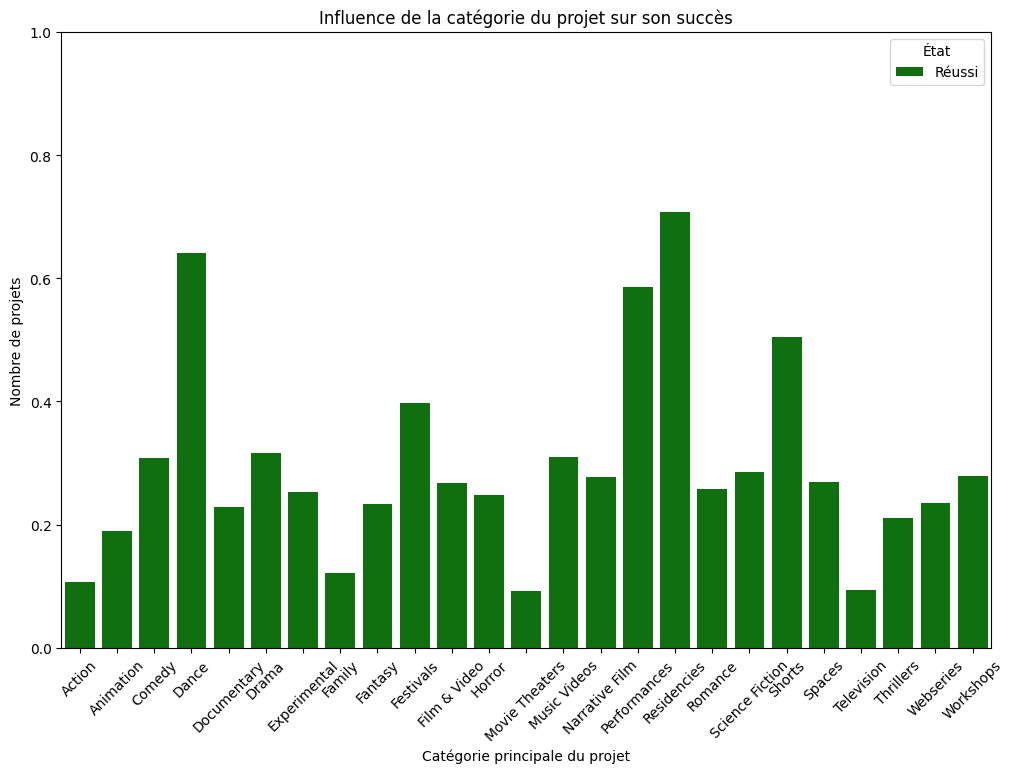

In [139]:
# Création du graphique à barres empilées
plt.figure(figsize=(12, 8))
sns.barplot(data=normalized_success_failure, x=normalized_success_failure.index, y='successful', color='green', label='Réussi')

# Personnalisation du graphique
plt.title("Influence de la catégorie du projet sur son succès")
plt.xlabel("Catégorie principale du projet")
plt.ylabel("Nombre de projets")
plt.legend(title='État', loc='upper right')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

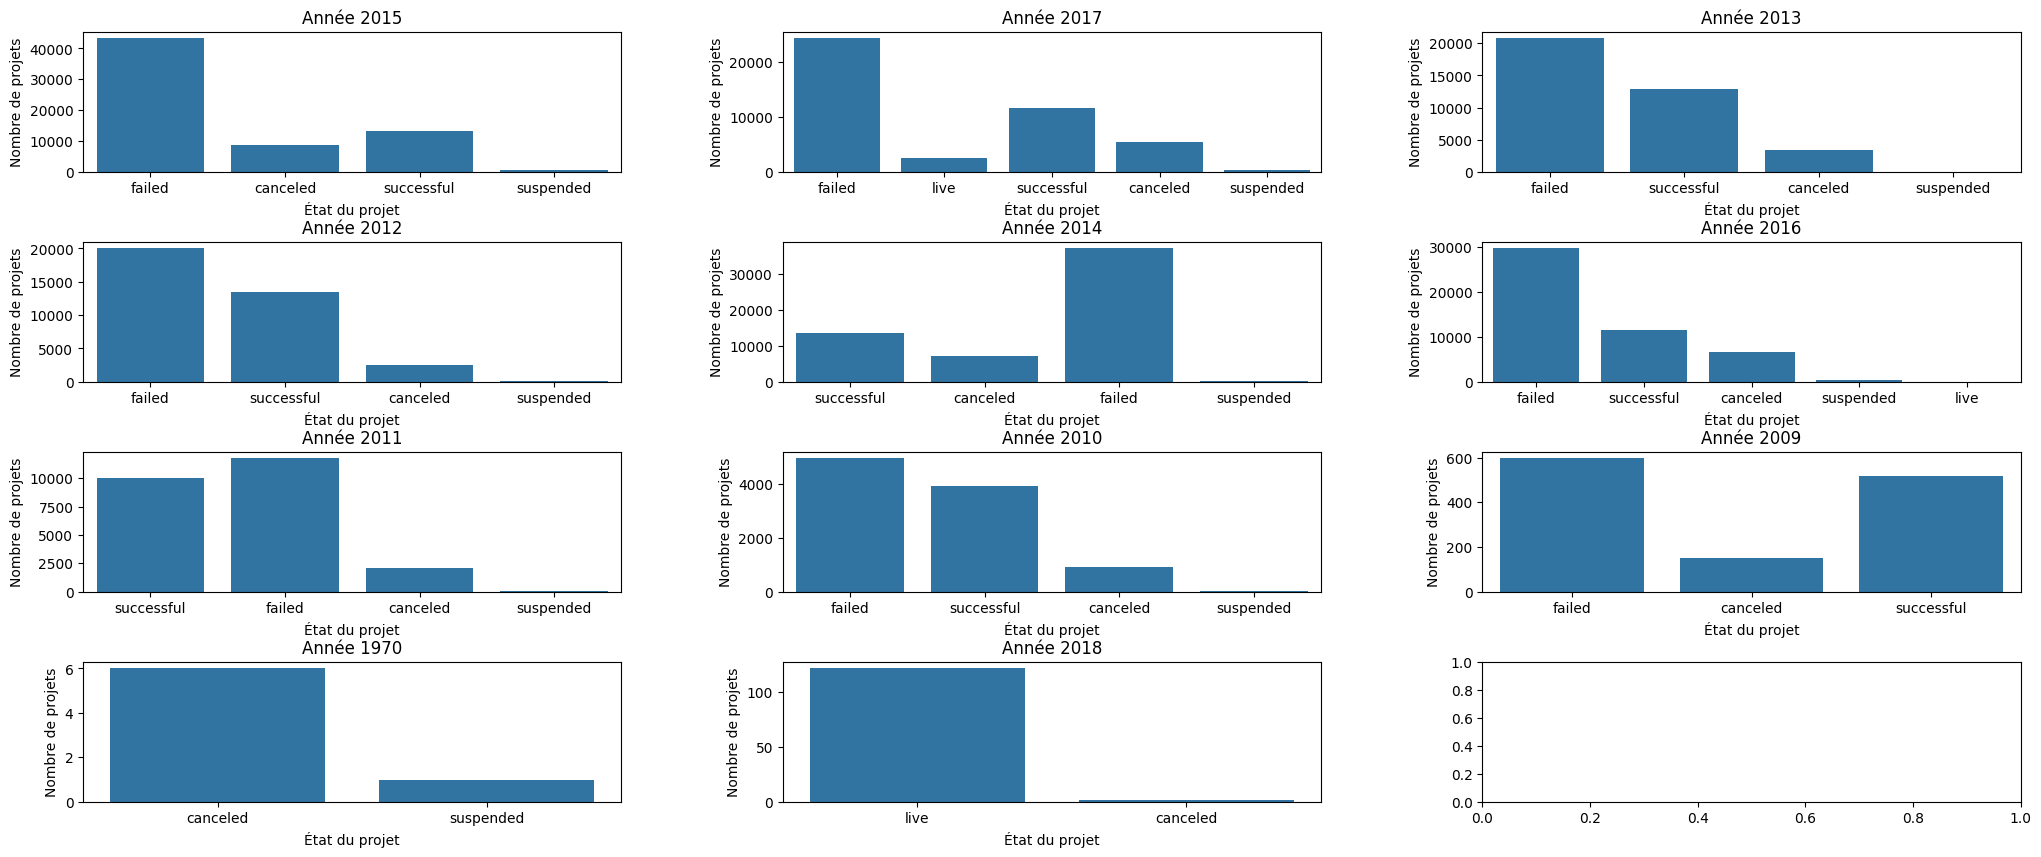

In [148]:
# Déterminer le nombre d'années uniques
unique_years = clean_crowdfunding_2018_filtered['year'].unique()
num_unique_years = len(unique_years)

# Calculer le nombre de lignes et de colonnes nécessaires
num_rows = (num_unique_years + 2) // 3  # Division entière pour obtenir le nombre de lignes nécessaires
num_cols = min(num_unique_years, 3)  # Maximum de 3 colonnes par ligne

# Création d'une figure et de sous-graphiques en fonction de l'année
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(25, 10))

# Ajustement de l'espacement entre les sous-graphiques
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Boucle sur chaque année unique pour créer un graphique pour cette année
for i, year in enumerate(unique_years):
    # Calculer les coordonnées de sous-graphique
    row = i // 3
    col = i % 3
    
    # Sélection des données pour l'année spécifique
    data_year = clean_crowdfunding_2018_filtered[clean_crowdfunding_2018_filtered['year'] == year]
    
    # Création du graphique pour cette année
    sns.countplot(data=data_year, x='state', ax=axes[row, col])
    axes[row, col].set_title(f"Année {year}")
    axes[row, col].set_xlabel("État du projet")
    axes[row, col].set_ylabel("Nombre de projets")

# Affichage des sous-graphiques
plt.show()